# Mini Project 5: World Democracy and Freedom

### Learning Objective
Gaining experience in data preparation, unsupervised machine learning analysis, and visualisation of clusters.

### Project Objective
For the last 50 years the organisation Freedom House (https://freedomhouse.org) monitors and protects the democracy values, political rights and civil liberties in the world. We would like to get insights about the status of freedom of all countries in 2023.

## Tasks

### 1. Research the work of Freedom House and choose some of their data collections, relevant to the objective.

In [138]:
#Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [139]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

In [140]:
#df = pd.read_csv('/Users/emiliocastrolagunas/Desktop/Sem4/BI/Notebooks/Data/freedom.csv')
df= pd.read_csv('../excercises/Data/freedom.csv')



In [141]:
#idea of general looks of data
df.head()

,country,1972,1973,1974,1975,1976,1977,1978,1979,1980,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,4.5,6.5,6.5,6.5,6.5,6.0,7.0,7.0,7.0,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,5.5,5.5
1,Albania,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
2,Algeria,6.0,6.0,6.0,6.5,6.0,6.0,6.0,6.0,6.0,...,5.5,5.5,5.5,5.5,5.5,5.5,5.5,5.5,5.5,5.5
3,Andorra,3.5,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,Angola,NaN,NaN,NaN,6.0,6.0,7.0,7.0,7.0,7.0,...,5.5,5.5,5.5,5.5,5.5,5.5,6.0,6.0,6.0,5.5


In [142]:
df.shape

(193, 48)

In [143]:
#checking for null-values
df.isnull().sum()

country      0
1972        51
1973        50
1974        48
1975        42
1976        41
1977        45
1978        42
1979        39
1980        38
1981        36
1982       193
1983        35
1984        34
1985        34
1986        34
1987        34
1988        34
1989        33
1990        33
1991        14
1992        10
1993         5
1994         4
1995         4
1996         4
1997         4
1998         4
1999         3
2000         3
2001         3
2002         3
2003         3
2004         3
2005         3
2006         1
2007         1
2008         1
2009         1
2010         1
2011         0
2012         0
2013         0
2014         0
2015         0
2016         0
2017         0
2018         0
dtype: int64

### 2. Clean and explore the data and prepare it for clustering


In [144]:
#def replace_zeros_and_nulls_with_median(df, column_name):.
#    non_zero_non_null_values = df[column_name][(df[column_name] != 0) & (~df[column_name].isnull())]
#    if not non_zero_non_null_values.empty:
#        median_value = non_zero_non_null_values.median()
#        df[column_name].fillna(median_value, inplace=True)
#    return df
#years_with_null=['1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010']
#years_with_null
#for year_string in years_with_null:
     #replace_zeros_and_nulls_with_median(df, year_string)
        
#df.isnull().sum()

In [145]:
#We would like to explore the differences between 2002 and 2018 as that's the closest to todays reality.
#The reason for that choice, is because 9/11 was in 2001. It could be interesting to see an potential impact from that.
#On top of that, there's few null values as seen above, so an accurate replacement of nulls is easier.


median_2002 = df['2002'].median()
df['2002'].fillna(median_2002, inplace=True)
df.isnull().sum()




country      0
1972        51
1973        50
1974        48
1975        42
1976        41
1977        45
1978        42
1979        39
1980        38
1981        36
1982       193
1983        35
1984        34
1985        34
1986        34
1987        34
1988        34
1989        33
1990        33
1991        14
1992        10
1993         5
1994         4
1995         4
1996         4
1997         4
1998         4
1999         3
2000         3
2001         3
2002         0
2003         3
2004         3
2005         3
2006         1
2007         1
2008         1
2009         1
2010         1
2011         0
2012         0
2013         0
2014         0
2015         0
2016         0
2017         0
2018         0
dtype: int64

### 3. Choose an unsupervised ML algorithm and apply it to create clusters of countries, based on their freedom assessment measure.

In [146]:
X = df.values
X = X[:,31:]

print(X)

[[6.0 6.0 5.5 ... 6.0 5.5 5.5]
 [3.0 3.0 3.0 ... 3.0 3.0 3.0]
 [5.5 5.5 5.5 ... 5.5 5.5 5.5]
 ...
 [5.5 5.0 5.0 ... 6.5 6.5 6.5]
 [4.0 4.0 4.0 ... 4.0 4.0 4.0]
 [6.0 6.0 6.5 ... 5.0 5.5 5.0]]


IndexError: index 31 is out of bounds for axis 1 with size 17

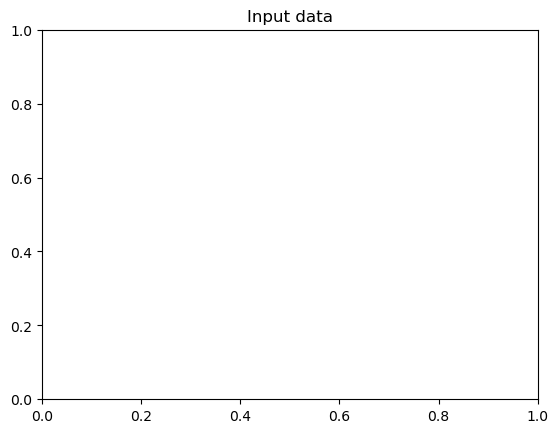

In [147]:
x_index = 31  # Index to use for the x-coordinate
y_index = 47  # Index to use for the y-coordinate

# Create a figure and set the title
plt.figure()
plt.title('Input data')

# Calculate the range of X and Y based on the specified indices
x_min = X[:, x_index].min()
x_max = X[:, x_index].max()
y_min = X[:, y_index].min()
y_max = X[:, y_index].max()

# Set the plot limits
plt.xlim(x_min - 1, x_max + 1)
plt.ylim(y_min - 1, y_max + 1)

# Scatterplot of the points using the specified indices
plt.scatter(X[:, x_index], X[:, y_index], marker='o', facecolors='none', edgecolors='black', s=30)

plt.show()

IndexError: index 31 is out of bounds for axis 1 with size 17

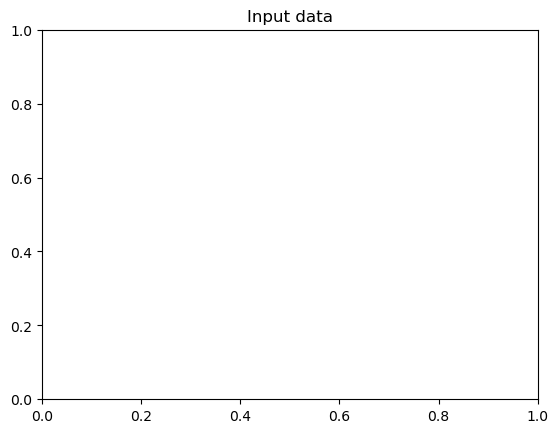

In [153]:
# Create a figure and set the title
plt.figure()
plt.title('Input data')

# Get the range of the specified indices (31 and 47)
x_index = 31
y_index = 47

x_min = X[:, x_index].min()
x_max = X[:, x_index].max()
y_min = X[:, y_index].min()
y_max = X[:, y_index].max()

# Set plot limits
plt.xlim(x_min - 1, x_max + 1)
plt.ylim(y_min - 1, y_max + 1)

# Scatterplot of the points using the specified indices
plt.scatter(X[:, x_index], X[:, y_index], marker='o', facecolors='none', edgecolors='black', s=30)

plt.show()

In [ ]:
# Determine k by minimizing the distortion - 
# the sum of the squared distances between each observation vector and its centroid
distortions = []
K = range(2,10)
for k in K:
    model = KMeans(n_clusters=k).fit(X)
    
    distortions.append(sum(np.min(cdist(X, model.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0]) 
print("Distortion: ", distortions)

In [ ]:
# Plot the elbow
plt.title('Elbow Method for Optimal K')
plt.plot(K, distortions, 'bx-')
plt.xlabel('K')
plt.ylabel('Distortion')
plt.show()

In [ ]:
# Determine k by maximising the silhouette score for each number of clusters
scores = []
K = range(2,10)
for k in K:
    model = KMeans(n_clusters=k).fit(X)
    model.fit(X)
    score = metrics.silhouette_score(X, model.labels_, metric='euclidean', sample_size=len(X))
    print("\nNumber of clusters =", k)
    print("Silhouette score =", score)
    scores.append(score)

In [ ]:
num_clusters=3

In [ ]:
# Create an instance of KMeans classifier
kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=20)
# init: method of experimemtal finding the initial location of the centroids
# n_init: the algorithm will run n_init times with different cetroids and the best result of those will be taken

In [ ]:
# Train the KMeans clustering model
kmeans.fit(X)

In [ ]:
# Predict 5 clusters in X
y = kmeans.predict(X)
y

In [ ]:
# See the predicted labels of clusters
# cluster labels are stored in variable 'kmeans.labels_'
print(kmeans.labels_)

# same as print(Y)

In [ ]:
# Split the clusters, for demo purpose only
for i in range(num_clusters):
    # slice the cluster
    cluster = X[y == i]    
    # print the shape
    print("Cluster ", i, ": ", cluster.shape)    
    # plot the points of this cluster
    plt.scatter(cluster[:, 0], cluster[:, 1])   
    plt.grid(True)
    plt.show()

In [ ]:
# Plot the points with color code of the predicted clusters
# viridis - a color map, https://matplotlib.org/users/colormaps.html
# s - marker size, here, the dots size
# c - marker color, here taken from the predicted clusters
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')

plt.grid(True)
plt.show()

In [ ]:
# See the cluster centres, created during the clustering
# cluster centres are stored in a variable named 'cluster_centers_'
print(kmeans.cluster_centers_)

In [ ]:
# we need a grid of points for drawing a smooth border between clusters
# define step size of the mesh 
#step_size = 0.05

# we need to cover all points of our data
# create a grid out of an array of X values and an array of y values
#x_coord = np.arange(x_min, x_max, step_size)
#y_coord = np.arange(y_min, y_max, step_size)
#
# meshgrid() creates a matrix of coordinates from the two vectors of coordinates
#x_vals, y_vals = np.meshgrid(x_coord, y_coord)

In [ ]:
step_size = 0.05
x_coord = np.arange(x_min, x_max, step_size)
y_coord = np.arange(y_min, y_max, step_size)
x_vals, y_vals = np.meshgrid(x_coord, y_coord)

# Flatten the meshgrid to create data points for prediction
xx = x_vals.ravel()
yy = y_vals.ravel()

# Concatenate x and y coordinates
grid_data = np.c_[xx, yy]

# Predict cluster assignments for the grid data
labels = kmeans.predict(grid_data)

# Reshape the labels to match the shape of the meshgrid
labels = labels.reshape(x_vals.shape)

# Visualization: Plot the cluster assignments on the grid
plt.figure(figsize=(8, 8))
plt.imshow(labels, interpolation='nearest',
           extent=(x_vals.min(), x_vals.max(), y_vals.min(), y_vals.max()),
           cmap=plt.cm.Paired, aspect='auto', origin='lower')
plt.colorbar(label='Cluster Assignments')
plt.scatter(X[:, 0], X[:, 1], marker='o', c='red', edgecolor='k', s=30)
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [ ]:
# Predict cluster labels for all the points on the grid 
# ravel() returns 1D-array
#xx = x_vals.ravel()
#yy = y_vals.ravel()

# np.c_ concatenates the arguments
#labels = kmeans.predict(np.c_[xx,yy])
#labels = labels.reshape(x_vals.shape)

### 4. Create a geographical map of the world and colours the countries on it to reflect on their freedom status (cluster).